# Configuration et Imports

In [7]:
import sys
from pathlib import Path

# Ajouter le projet au path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

# Imports PyTorch
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Imports depuis src/
from src.data_loader import get_data_loaders
from src.models import BaselineCNN
from src.utils import get_mixup_cutmix_transform
from src.trainer import train_model

# Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

# Chemins
TRAIN_DIR = project_root / 'data' / 'train'
VAL_DIR = project_root / 'data' / 'val'

Device: cpu


# Data Loader

In [3]:
train_loader, val_loader, class_names = get_data_loaders(train_dir=str(TRAIN_DIR),val_dir=str(VAL_DIR), batch_size=25, img_size=100)

# model BaselineCNN

In [4]:
model = BaselineCNN()
print(model)

BaselineCNN(
  (conv1): Conv2d(3, 24, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(24, 8, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (layer1): Linear(in_features=4232, out_features=220, bias=True)
  (act): GELU(approximate='none')
  (layerfn): Linear(in_features=220, out_features=6, bias=True)
)


In [9]:
lr = 0.001
num_epochs = 10
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()


# Trainer

In [26]:
trainer(model, train_loader, val_loader, optimizer, criterion, num_epochs=20)

Epoch [1/20]
  Train → Loss: 0.3805, Accuracy: 86.49%
  Val   → Loss: 0.5647, Accuracy: 81.75%
--------------------------------------------------
Epoch [2/20]
  Train → Loss: 0.3486, Accuracy: 87.93%
  Val   → Loss: 0.6539, Accuracy: 79.61%
--------------------------------------------------
Epoch [3/20]
  Train → Loss: 0.3318, Accuracy: 88.01%
  Val   → Loss: 0.6291, Accuracy: 81.11%
--------------------------------------------------
Epoch [4/20]
  Train → Loss: 0.2996, Accuracy: 89.38%
  Val   → Loss: 0.6512, Accuracy: 80.02%
--------------------------------------------------
Epoch [5/20]
  Train → Loss: 0.3099, Accuracy: 89.01%
  Val   → Loss: 0.6418, Accuracy: 80.17%
--------------------------------------------------
Epoch [6/20]
  Train → Loss: 0.2612, Accuracy: 90.77%
  Val   → Loss: 0.6885, Accuracy: 81.49%
--------------------------------------------------
Epoch [7/20]
  Train → Loss: 0.2672, Accuracy: 90.12%
  Val   → Loss: 0.7604, Accuracy: 79.23%
-----------------------------

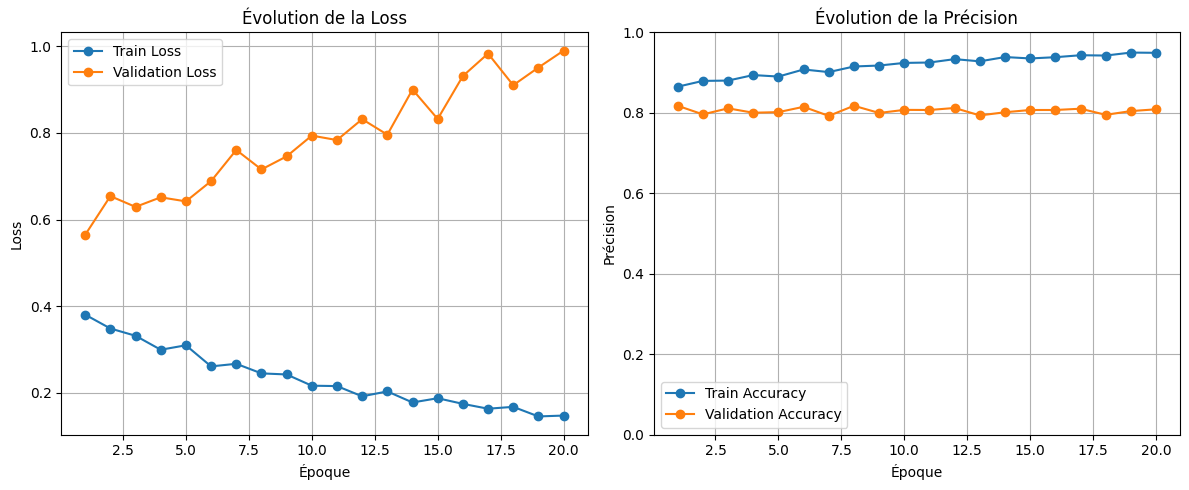

In [1]:
import matplotlib.pyplot as plt

# Données d'entraînement et de validation
epochs = list(range(1, 21))

train_loss = [0.3805, 0.3486, 0.3318, 0.2996, 0.3099, 0.2612, 0.2672, 0.2451,
              0.2426, 0.2167, 0.2158, 0.1922, 0.2035, 0.1780, 0.1878, 0.1748,
              0.1636, 0.1679, 0.1458, 0.1478]

train_acc = [86.49, 87.93, 88.01, 89.38, 89.01, 90.77, 90.12, 91.51,
             91.75, 92.40, 92.50, 93.34, 92.79, 93.86, 93.51, 93.82,
             94.31, 94.23, 94.97, 94.91]

val_loss = [0.5647, 0.6539, 0.6291, 0.6512, 0.6418, 0.6885, 0.7604, 0.7154,
            0.7456, 0.7935, 0.7832, 0.8314, 0.7956, 0.8998, 0.8319, 0.9309,
            0.9827, 0.9097, 0.9505, 0.9895]

val_acc = [81.75, 79.61, 81.11, 80.02, 80.17, 81.49, 79.23, 81.75,
           79.96, 80.73, 80.70, 81.20, 79.35, 80.14, 80.70, 80.70,
           81.02, 79.50, 80.43, 80.87]

# Conversion des précisions en proportions (optionnel)
train_acc = [x / 100 for x in train_acc]
val_acc = [x / 100 for x in val_acc]

# Création des graphiques
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Évolution de la Loss')
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.title('Évolution de la Précision')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()